# <img src="./assets/icons/ai.png" style="height:1em"> Hands on learning of Deep Learning and Neural Networks <img src="./assets/icons/ai-assistant.png" style="height:1em">

## <img src="./assets/icons/lets-go.png" style="height:1em"> Introduction

<div align="center">
    <video width="1280" height="720" src="./assets/videos/Story.mp4" controls>
</div>

Deep learning (DL) is a branch of Artificial Intelligence (AI) and Machine Learning (ML) that utilizes multi-layered Artificial Neural Networks (ANNs) to achieve cutting-edge accuracy in various tasks such as object detection, speech recognition, language translation, and more.
Numerous experiments have demonstrated that neural networks excel with natural data (speech, vision, language) that exhibit highly nonlinear properties.

<div align="center">
    <video width="1280" height="720" src="./assets/videos/DL.mp4" controls>
</div>

The term "deep" in deep learning refers to the numerous layers of algorithms, or neural networks, utilized to recognize patterns in data. 
Deep learning's highly flexible architectures can learn directly from raw data, mimicking the operation of the human brain, and can enhance their predictive accuracy with larger datasets.

Moreover, deep learning is the key technology enabling high precision and accuracy in tasks such as speech recognition, language translation, and object detection. 
It has driven many recent advancements in Artificial Intelligence, including OpenAI's ChatGPT, Google DeepMind’s AlphaGo, self-driving cars, and intelligent voice assistants like Siri, Cortana, and Alexa. 
Let's explore what other applications these neural networks can handle:

<div align="center">
    <video width="1280" height="720" src="./assets/videos/Applications.mp4" controls>
    <br>
    <video width="1280" height="720" src="./assets/videos/Quiz-AI.mp4" controls>
</div>

This tutorial will guide you through the fundamentals of neural networks from an optimization perspective.

By the end of the tutorial, you will understand:

1. The Gradient Descent Algorithm for optimization
2. Modeling simple multi-layer perceptrons
3. The Backpropagation Algorithm
4. Training your own simple neural network for classification
5. (Bonus) Techniques for fooling a trained neural network

###  <img src="./assets/icons/setup.png" style="height:1em"> Let's setup by importing relevant libraries and relevant utility functions

First, we need to import the relevant libraries.

**Note**: Graphviz might need to be installed manually. For more information, please visit (https://graphviz.org/download/)

In [1]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install graphviz
%pip install adjustText

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from graphviz import Digraph
from adjustText import adjust_text

seed = 1337

np.random.seed(seed)

%matplotlib inline

## <img src="./assets/icons/thinking.png" style="height:1em"> Recap on Optimization: Playing with optimization

Let's recap our optimization class.

Suppose we have an optimization function that looks like this:

<div align="center">
    <img src="./assets/images/Optimization.png" width=30%>
</div>

We aim to create an algorithm that can find the maxima (or minima) of the given function, i.e., the reddest (or bluest) point in the function.

Let's start by creating this toy function and visualizing it.

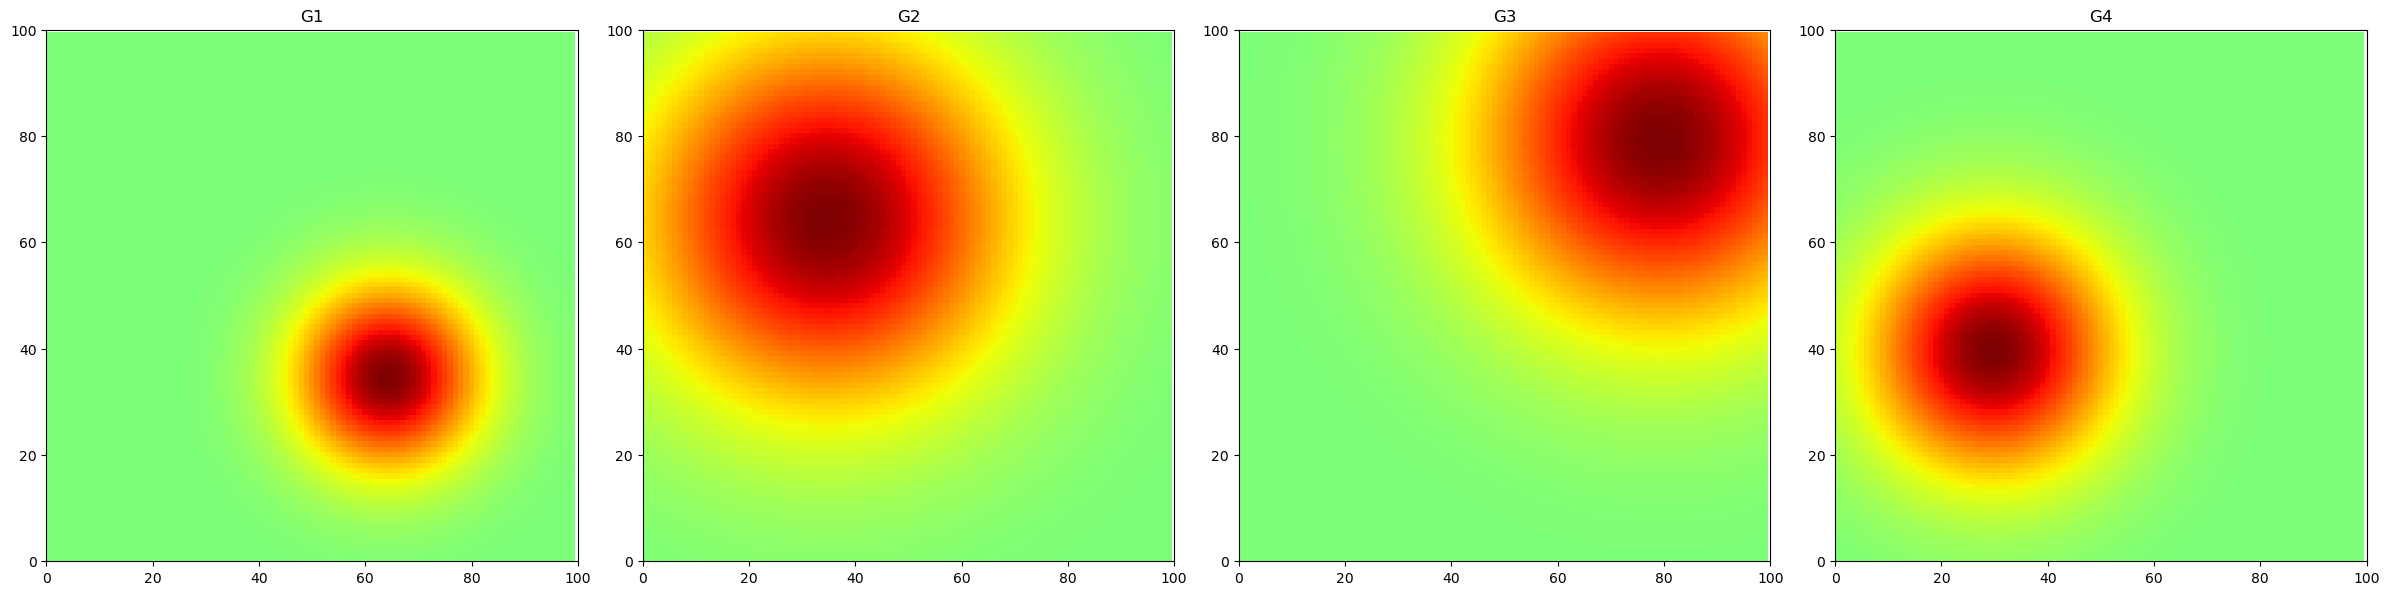

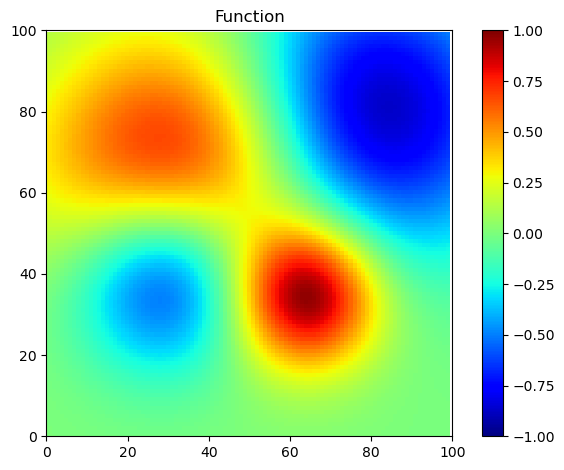

In [3]:
# Defining a grid of Xs and Ys
resolution = 100
X, Y = np.meshgrid( np.linspace(-1,1,resolution), np.linspace(-1,1,resolution) )

# Defining 4 different 2D functions
mux, muy, sigma = 0.3, -0.3, 4
G1 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)

mux, muy, sigma = -0.3, 0.3, 2
G2 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)

mux, muy, sigma = 0.6, 0.6, 2
G3 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)

mux ,muy, sigma = -0.4, -0.2, 3
G4 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)


# Composing the final function
G = G1 + G2 - G3 - G4


fig  = plt.figure(figsize=(6*4,6)) # Defining the figure space
axes = fig.subplots(1, 4)          # Defining the subplots in the figure

for ax, g, t in zip(axes.flat, [G1, G2, G3, G4], ['G1', 'G2', 'G3', 'G4']): # Iterating over axes and functions
    ax.imshow(g, vmin=-1, vmax=1, cmap='jet')                               # Ploting the function on the subplot
    ax.set(title=t, xlim=(0, 100), ylim=(0, 100))                           # Setting the title and limits of the subplot

fig.tight_layout() # Removes extra spacing from the figure

fig, ax = plt.subplots()

cax = ax.imshow(G, vmin=-1, vmax=1, cmap='jet')
ax.set(title="Function", xlim=(0, 100), ylim=(0, 100))

fig.colorbar(cax) # Attaching the colorbar to the figure

fig.tight_layout() 
plt.show()               # Instruct Matplotlib to show the figures created

# fig.savefig("./assets/images/Optimization.png", dpi=300)

Now that we have the function, we can start optimizing it.

Let's **begin** at a point, (70.0, 60.0), on the grid. We will sample points around this region and calculate the direction of further sampled points using the gradient's direction of movement.

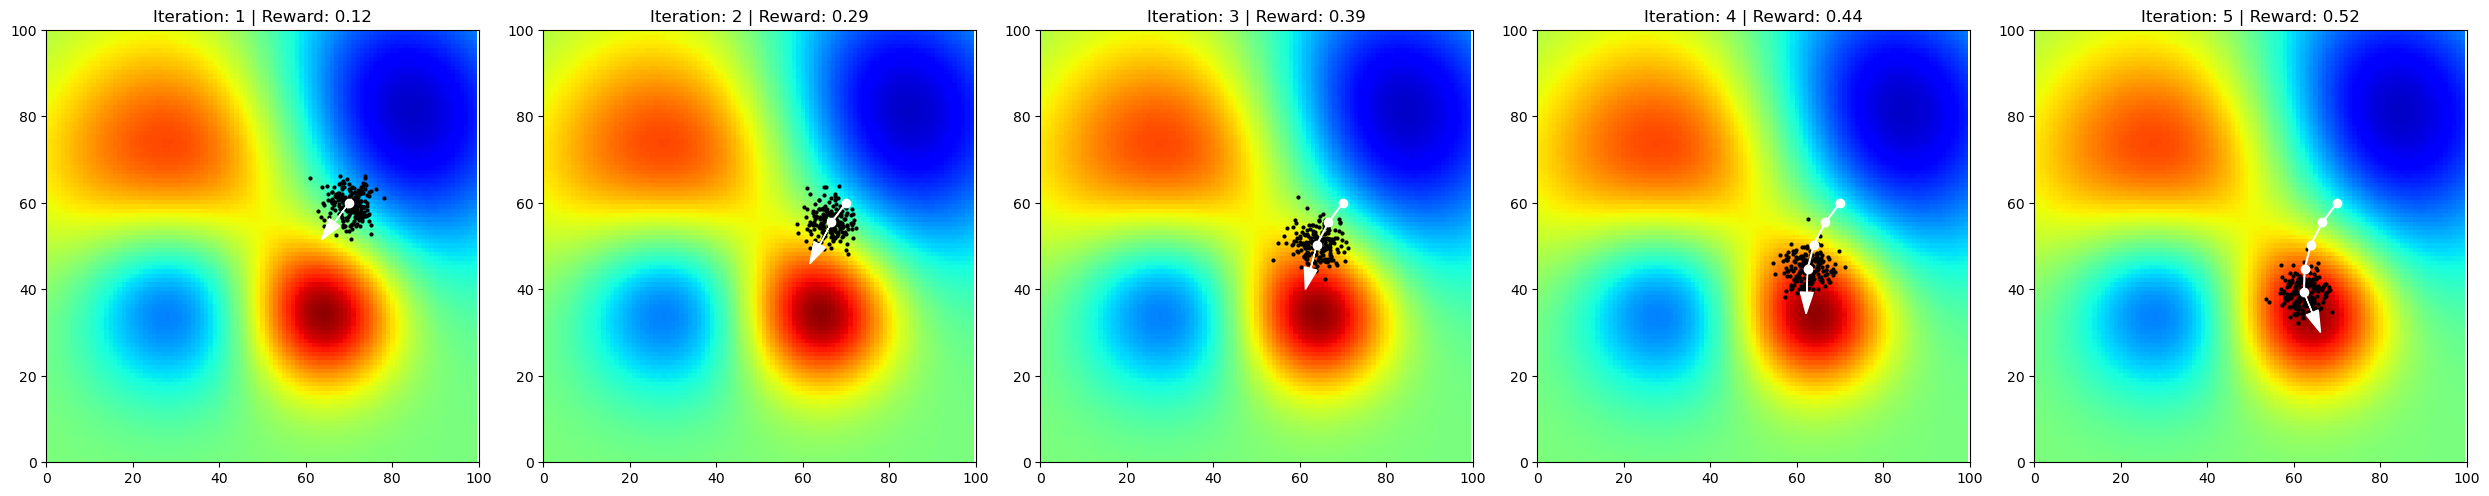

In [4]:
n_iter = 5     # Number of Steps to take for optimisation
alpha  = 0.03  # Learning rate of the optimisation

w = np.array([70.0, 60.0]) # Starting Parameter (Point)
sigma  = 3                 # Standard deviation of the samples around current parameter vector

fig  = plt.figure( figsize=(5*n_iter, 5) )
axes = fig.subplots(1, n_iter) 

prevx, prevy = [], []
for q, ax in zip(range(n_iter), axes):
    
    # Draw the Optimization Landscape
    ax.imshow(G, vmin=-1, vmax=1, cmap='jet')

    # Sample Random Population
    noise = np.random.randn(200, 2)
    wp = np.expand_dims(w, 0) + sigma * noise
    x,y = zip(*wp)
    
    # Estimate Gradient (Direction)
    R  = np.array([G[int(wi[1]), int(wi[0])] for wi in wp])
    R -= R.mean()
    R /= R.std() 
    g  = np.dot(R, noise)
    u  = alpha * g
    
    prevx.append(w[0])
    prevy.append(w[1])
    
    # Draw Population on Landscape (Black Points)
    ax.scatter(x, y, 4, 'k', edgecolors='face')
    
    # Draw estimated gradient (direction) as arrow (White Arrow)
    ax.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    
    # Draw Parameter History (White Points)
    ax.plot(prevx, prevy, 'wo-')
    
    # Update Parameter According to the gradient
    w += alpha * g
    
    ax.set(title=f"Iteration: {q+1} | Reward: {G[int(w[0]), int(w[1])]:.2f}", xlim=(0, 100), ylim=(0, 100))

fig.tight_layout()

#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Try optimizing for finding minima (bluest part) from the function 

## <img src="./assets/icons/location.png" style="height:1em"> Playing with gradients

We can compute the best direction to change our weight vector, which is mathematically guaranteed to be the direction of the steepest descent (as the step size approaches zero). 
This direction is related to the gradient of the cost function. 

For one-dimensional functions, the slope is the instantaneous rate of change of the function at any point of interest. 
The gradient is a generalization of the slope for functions that take a vector of numbers instead of a single number. 
The gradient is a vector of slopes (or derivatives) for each dimension in the input space.

The mathematical expression for the derivative of a 1-D function with respect to its input is:

$$ \frac{d(f(x))}{dx} = \lim_{h \to 0}~ \frac{f(x+h) - f(x)}{h} = \lim_{h \to 0}~ \frac{f(x+h) - f(x-h)}{2h} $$

When dealing with functions that take a vector of numbers, we refer to the derivatives as partial derivatives, and the gradient is simply the vector of partial derivatives for each dimension.

Let's start by creating our own **datatype** to save a *single scalar value* and its *gradient*.

**Note**: We are creating our own datatype to understand the behind-the-scenes workings of well-established libraries like Numpy, TensorFlow, and PyTorch.

In [5]:
class Value:
    def __init__(self, data, label='', _children=(), _op=''):
        
        # Information about value, gradient and its name
        self.data  = data
        self.grad  = 0.0
        self.label = label
        
        # Utility attributes for the calculating and passing gradients (Backprop)
        self._backward = lambda: None
        self._prev     = set(_children)
        self._op       = _op 
    
    # Simple arithemtic operations on value and computing corresponding gradients   
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, label='+', _children=(self, other), _op='+')

        def _backward():
            self.grad  += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, label='*', _children=(self, other), _op='*')

        def _backward():
            self.grad  += other.data * out.grad
            other.grad += self.data  * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, label=f'**{other}', _children=(self,), _op='**')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    # Other arithmetic operations
    ### Don't need to define backward functions since, they use __mul__ or __add__ for which backward is already defined. 
    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1
    
    # Simple transformations on Value and computing corresponding gradients
    def relu(self):
        out = Value(0 if self.data < 0 else self.data, label='ReLU', _children=(self,), _op='ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1)/(np.exp(2*x) + 1)
        out = Value(t, label='Tanh', _children=(self, ), _op='Tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        
        return out
  
    def exp(self):
        x = self.data
        out = Value(np.exp(x), label='Exp',  _children=(self, ), _op='Exp')
        
        def _backward():
            self.grad += out.data * out.grad 
        out._backward = _backward
        
        return out
    
    # Information when printing instance
    def __repr__(self):
        if self.label:
            return f"Value(node={self.label}, data={self.data}, grad={self.grad})"
        else:
            return f"Value(data={self.data}, grad={self.grad})"
    
    # Recurisvely call backward -> Backprop
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1
        for v in reversed(topo):
            v._backward()

This class can store a scalar value and its gradient. Moreover, it can also compute gradients and update it accordingly.

Let's create some visualization utilities to help us understand the flow of gradients and data in a complicated function.

In [6]:
# Builds the graph from a root node
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

# Visualizes the graph built from root node
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

Let's start by defining our own simple one-variable function and visualise it by plotting it,

$$ f(x) = y = x^2 - 4x + 3 $$

In [7]:
def cost_function(x):
    return x**2 - 4*x + 3 

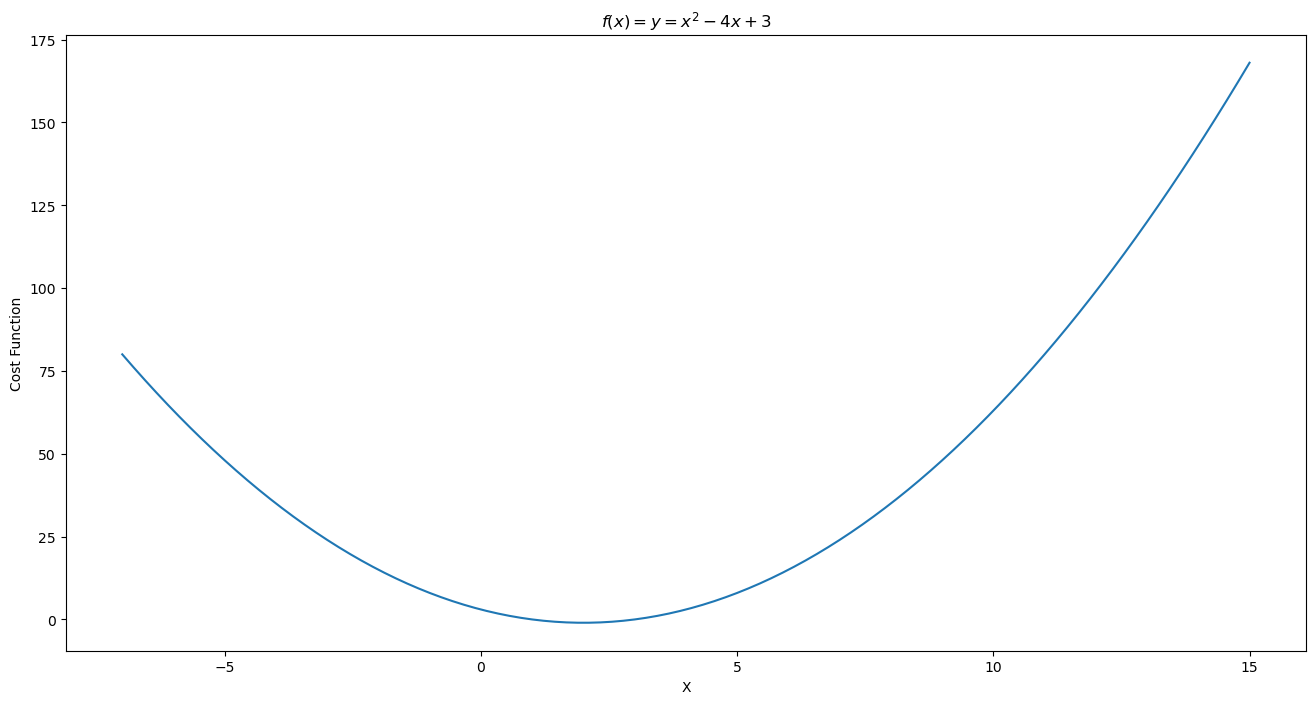

In [8]:
X = np.linspace(-7, 15, 100)
Y = cost_function(X)

fig = plt.figure(figsize=(16, 8))
ax  = fig.subplots()

ax.plot(X, Y)

ax.set(xlabel='X', ylabel='Cost Function', title=f"$f(x) = y = x^2 - 4x + 3$")

plt.show()

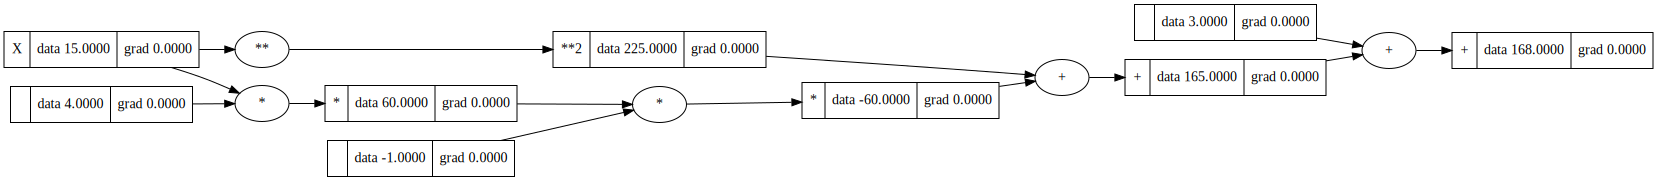

In [9]:
x = Value(15.0, label='X')
y = cost_function(x)

draw_dot(y)

Fortunately, we know what is the gradient for the function:
$$ \frac{d(f(x))}{dx} = \frac{dy}{dx} = 2x -4 $$ 

However, let's use a magic function of backprop where we do not explicitly calculate the gradient and let's see how it calculates the gradient. 

We know, that the gradient of the function should be 26 when $x$ = 15.0 

In [10]:
y.backward()
x

Value(node=X, data=15.0, grad=26.0)

Let's use the gradient information to update $x$ and visualize the process to understand how $x$ changes over the iterations.

Can we find the minima of the function by just **iteratively** doing this updation?

We aim to find the minima of the function by iteratively updating 

$$ w^{(k+1)} = w^{(k)} - \alpha \nabla_w \mathcal{J}(w^{(k)})$$

Here, $\alpha$ is step size for gradient descent also called learning rate. 

The gradient tells us the direction in which the function has the steepest rate of increase, but it does not tell us how far along this direction we should step. 
Choosing the step size (also called the learning rate) will become one of the most important (and most headache-inducing) hyperparameter settings in training a neural network.

Here's a more detailed explanation and visualization of how different learning rates affect gradient descent:

- **Too Small Learning Rate**: The optimization process will be slow, requiring many iterations to converge to the minimum.
- **Too Large Learning Rate**: The algorithm may overshoot the minimum, causing the optimization to diverge or bounce around the minimum without converging.

Step:  1 | X: 15.00 | f(X): 168.0000 | Gradient dy/dx: 26.0000
Step:  2 | X: 12.40 | f(X): 107.1600 | Gradient dy/dx: 20.8000
Step:  3 | X: 10.32 | f(X):  68.2224 | Gradient dy/dx: 16.6400
Step:  4 | X:  8.66 | f(X):  43.3023 | Gradient dy/dx: 13.3120
Step:  5 | X:  7.32 | f(X):  27.3535 | Gradient dy/dx: 10.6496
Step:  6 | X:  6.26 | f(X):  17.1462 | Gradient dy/dx:  8.5197
Step:  7 | X:  5.41 | f(X):  10.6136 | Gradient dy/dx:  6.8157
Step:  8 | X:  4.73 | f(X):   6.4327 | Gradient dy/dx:  5.4526
Step:  9 | X:  4.18 | f(X):   3.7569 | Gradient dy/dx:  4.3621
Step: 10 | X:  3.74 | f(X):   2.0444 | Gradient dy/dx:  3.4897

----------------------------------------------------------------------



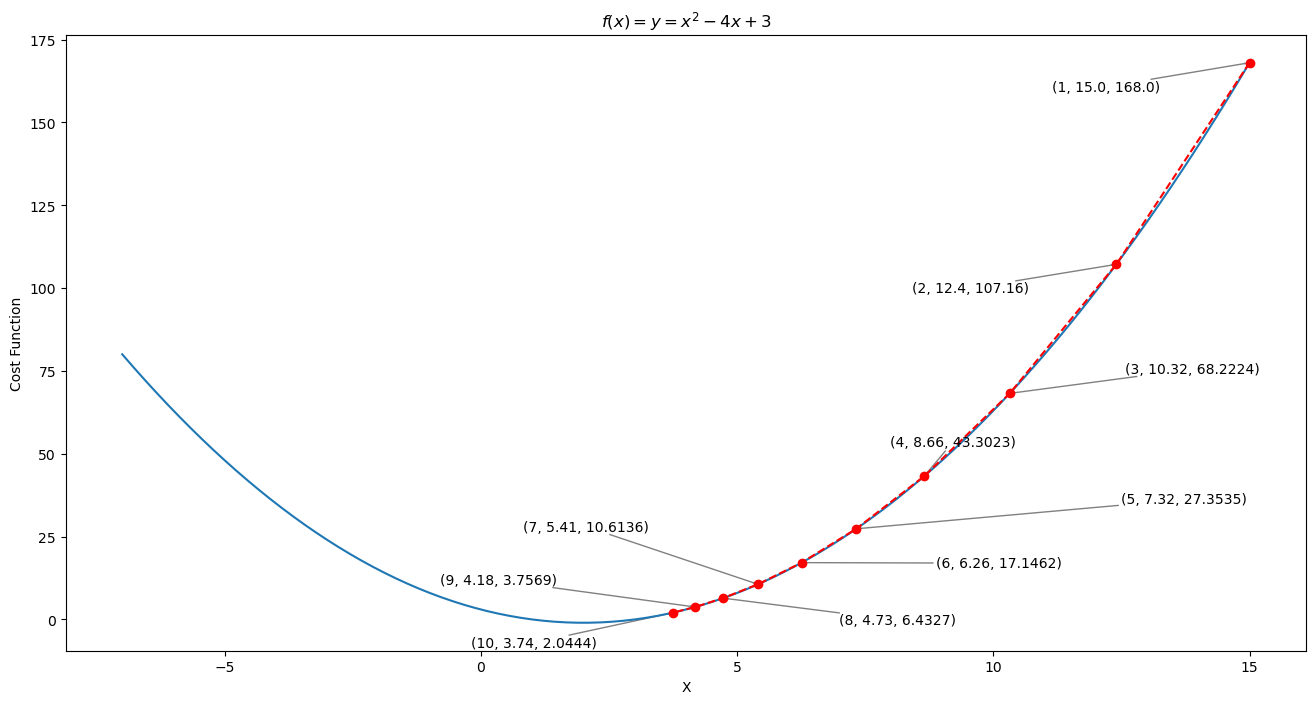

In [11]:
alpha = 0.1 # 0.1 # 0.3 # 0.9 #
num_iterations = 10

x = Value(15.0, label='X')

xy_list = []
for i in range(num_iterations):
    
    # Calculate f(x)
    y = cost_function(x)
    
    # Calculate dy/dx
    y.backward()
    
    xy_list.append((x.data, y.data))
    print(f"Step: {i+1:2d} | X: {x.data:5.2f} | f(X): {y.data:8.4f} | Gradient dy/dx: {x.grad:7.4f}")
    
    # Update x 
    x -= alpha * x.grad

print(f"\n{'-'*70}\n")

xy_list = np.asarray(xy_list)

ax.plot(xy_list[:, 0], xy_list[:, 1], 'r--', marker="o")

texts = []
for i in range(len(xy_list)):
    text = ax.text(*xy_list[i], f"({i+1}, {round(xy_list[i, 0], 2)}, {round(xy_list[i, 1], 4)})", ha='center', va='center')
    texts.append(text)
adjust_text(texts, expand=(3, 3.5), arrowprops=dict(arrowstyle='->', color='grey'), ax=ax)

fig

#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Try some 2D function and see how it goes for the minima. 
#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Can you guess how gradients will be calculated manually for multivariate functions ?

## <img src="./assets/icons/classification.png" style="height:1em"> Moving towards Classification

We've completed a **regression task**, where we followed the function to locate its minima.

But what approach should we take for **classification**?

Furthermore, how do we handle an approximation of the function using **sampled points**?

First, let's visualize what I'm referring to...

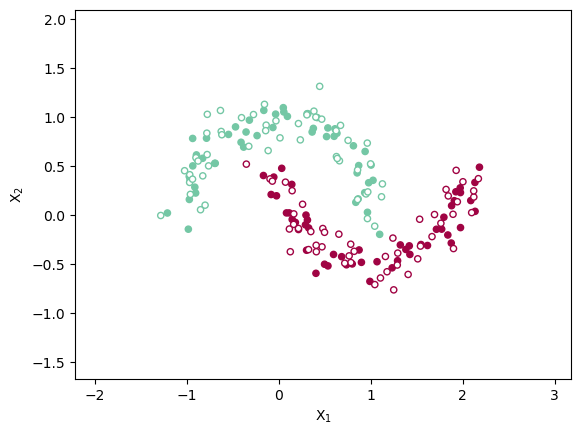

In [12]:
X_train, y_train = datasets.make_moons(n_samples=100, noise=0.1)
X_test,  y_test  = datasets.make_moons(n_samples=100, noise=0.15)

# make y be -1 or 1
y_train = y_train*2 - 1 
y_test  = y_test*2 - 1
 
cmap = plt.cm.Spectral

fig, ax = plt.subplots()

ax.scatter(X_train[:,0], X_train[:,1], c=[cmap(i%200) for i in y_train],               s=20)
ax.scatter(X_test[:,0],  X_test[:,1],  edgecolor=[cmap(i%200) for i in y_test], c='w', s=20)

ax.set(xlabel="X$_1$", ylabel="X$_2$", xlim =(X_train[:, 0].min()-1, X_train[:, 0].max()+1), ylim=(X_train[:, 1].min()-1, X_train[:, 1].max()+1))
plt.show()

In the previous figure, we observe that we don't have a precisely defined function for either the "left-moon" or "right-moon". 
Furthermore, our objective is to separate these two moons rather than locate a minimum.

<br>

This is precisely the task where current deep learning networks, or artificial neural networks, excel the most!

<div align="center">
    <video width="1280" height="720" src="./assets/videos/ML-DL.mp4" controls>
</div>

Deep learning is a subset of machine learning distinguished by its ability to automatically learn representations from data such as images, video, or text, without relying on human domain knowledge.

Let's delve into neural networks, which form the foundation of deep learning!

## <img src="./assets/icons/lab.png" style="height:1em"> Microscopic view of Neural Networks

### <img src="./assets/icons/neuron.png" style="height:1em"> Visualising Artificial Neuron (Perceptron)

<div align="center">
    <video width="1280" height="720" src="./assets/videos/Neuron.mp4" controls></video>
</div>

Feed-Forward Neural Networks are inspired by the information processing of one or more neural cells, known as neurons. 
These neurons are the fundamental computational units of the brain. 
A neuron receives input signals through its dendrites, which transmit the electrical signal to the cell body. 
The axon then carries the signal out to synapses, which are connections from one neuron's axon to another neuron's dendrites.

**Did you know**: The human brain contains approximately **100 billion** neurons and is connected by approximately **10<sup>14</sup>-10<sup>15</sup>** synapses. 
Can you guess how many parameters state-of-the-art neural networks have?

<details>
<summary> Click to read more on Biological Neurons </summary>
<br>

The human nervous system consists of over 100 billion cells called neurons. 
Neurons are specialized cells in the nervous system that process and transmit information.

Neurons have three main parts:

- The cell body, or **soma**, which contains the nucleus and maintains the cell's function
- Branching extensions called **dendrites**, which receive signals from other neurons and transmit them to the cell body
- A long fiber called an **axon**, which transmits signals away from the cell body to other neurons, muscles, or glands

<div align="center">
<img src="https://c4.staticflickr.com/3/2656/4253587827_9723c3ffd3_z.jpg" />
*Photo courtesy of GE Healthcare, http://www.flickr.com/photos/gehealthcare/4253587827/ *

<img src="https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg"/>
</div>

Some neurons have hundreds or thousands of dendrites, allowing them to receive input signals from numerous other neurons. 
The axons are also specialized; some, such as those that send messages from the spinal cord to the muscles in the hands or feet, may be very long---even up to several feet in length. 
To enhance signal transmission speed and prevent signal loss, axons are often surrounded by a fatty layer called the **myelin sheath**.
The myelin sheath is a layer of fatty tissue surrounding the axon of a neuron that both acts as an insulator and allows faster transmission of the electrical signal.
Axons branch out toward their ends, and at the tip of each branch is a *terminal button*.

<br>
</details>
<br>
<details>
<summary> History of Development of Perceptron </summary>
<br>

<div align="center">
    <img src="https://news.cornell.edu/sites/default/files/styles/story_thumbnail_xlarge/public/2019-09/0925_rosenblatt_main.jpg">
    <br>
    Frank Rosenblatt: Psychologist responsible for the first hardware implementation of the neural network (1957).
    <br>
    <img src="https://upload.wikimedia.org/wikipedia/en/5/52/Mark_I_perceptron.jpeg">
    <br>
    Mark I Perceptron machine, the first implementation of the perceptron algorithm designed by Frank Rosenblatt
</div>



<br>
</details>

**Simplified Model**. 
It's essential to note that the perceptron model of a biological neuron is highly simplified. 
For example, there are many different types of neurons, each with different properties. 
The dendrites in biological neurons perform complex nonlinear computations. 
The synapses are not just a single weight, they’re a complex non-linear dynamical system. 
The exact timing of the output spikes in many systems is known to be important, suggesting that the rate code approximation may not hold. 
Therefore, drawing direct analogies between artificial Neural Networks and real brains should be approached with caution. [[Brunel et.al.](https://www.sciencedirect.com/science/article/abs/pii/S0959438814000130)]

In the context of Neural Networks, we abstract these complexities into three primary components:

* **Activation:** Represents the neuron's output or level of activity
* **Bias:** Represents a default or threshold value that shifts the neuron's activation
* **Weight:** Represents the strength of the connection between neurons

Additionally, there's a transfer function that computes the neuron's activation by combining the weighted inputs, adding the bias, and applying a nonlinear transformation to limit the output range.
This limits the activations from growing too big or too small. (More on this later...)

<div align="center">
    <img src="./assets/images/Perceptron.png"/>
</div>

A perceptron computes its activation value based on:
a) incoming activations from connected neurons,
b) weights associated with these connections, and
c) a bias term.

The net input is a weighted sum of all the incoming activations (linear combination) plus the neuron's bias value:

$$ y = \psi(x) =  f(b + \sum\limits_{i=1}^n x_i w_i)$$

where $w_{i}$ is the weight, or connection strength, from the $i^{th}$ neuron, $x_i$ is the  input, $b$ is the bias value, and $f$ is the activation function applies a nonlinear transformation to the sum of weighted inputs.

**TL;DR** In summary, a perceptron transforms input data by applying a nonlinear function to a weighted sum of inputs, capturing essential aspects of how neurons process information in biological systems.

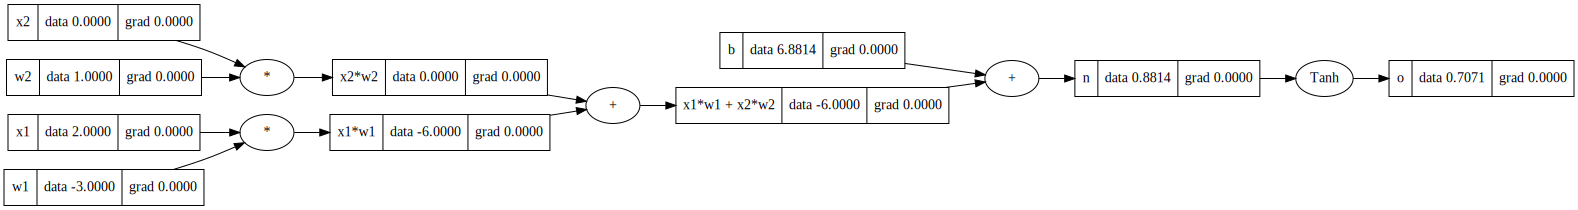

In [13]:
# Inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

draw_dot(o)

In practical applications, individual perceptrons are frequently employed as foundational components for more sophisticated models, such as multi-layer perceptrons (MLPs), which are capable of addressing a broader array of challenges. 
The basic perceptron model is limited to classification tasks where the data is linearly separable.

<div align="center">
    <img src="./assets/images/Perceptron-Classification.png" width=50%/>
    <img src="./assets/images/Perceptron-Learning.gif" width=45%/>
</div>

Is there any function which is hard for perceptron? 
</div>
    <img src="./assets/images/Perceptron-Problem.png" width=60%/>
    <img src="./assets/images/Perceptron-XOR.gif" width=35%/>
</div>

[[Minsky and Papert](https://leon.bottou.org/publications/pdf/perceptrons-2017.pdf)] showed in late 1960s that Perceptrons could not learn the XOR function.

Each activation function (or non-linearity) operates on a single number by performing a specific predefined mathematical operation. 
Various activation functions commonly encountered in practice include:

**Sigmoid:** 
$$ \sigma(x) = \frac{1}{1+e^{-x}} $$
**Tanh:**
$$ \tanh(x) = \frac{e^{2x}-1}{e^{2x}+1} $$
**ReLU:** 
$$ \text{ReLU}(x) = \begin{cases} 0 & \text{if} ~ x \leq 0 \\ 1 & \text{otherwise} \end{cases} $$
**LeakyReLU:** 
$$ \text{LeakyReLU}(x) = \begin{cases} \alpha x & \text{if} ~ x \leq 0; ~ \text{where}~\alpha~\text{is small constant (e.g., 0.01)} \\ 1 & \text{otherwise} \end{cases} $$

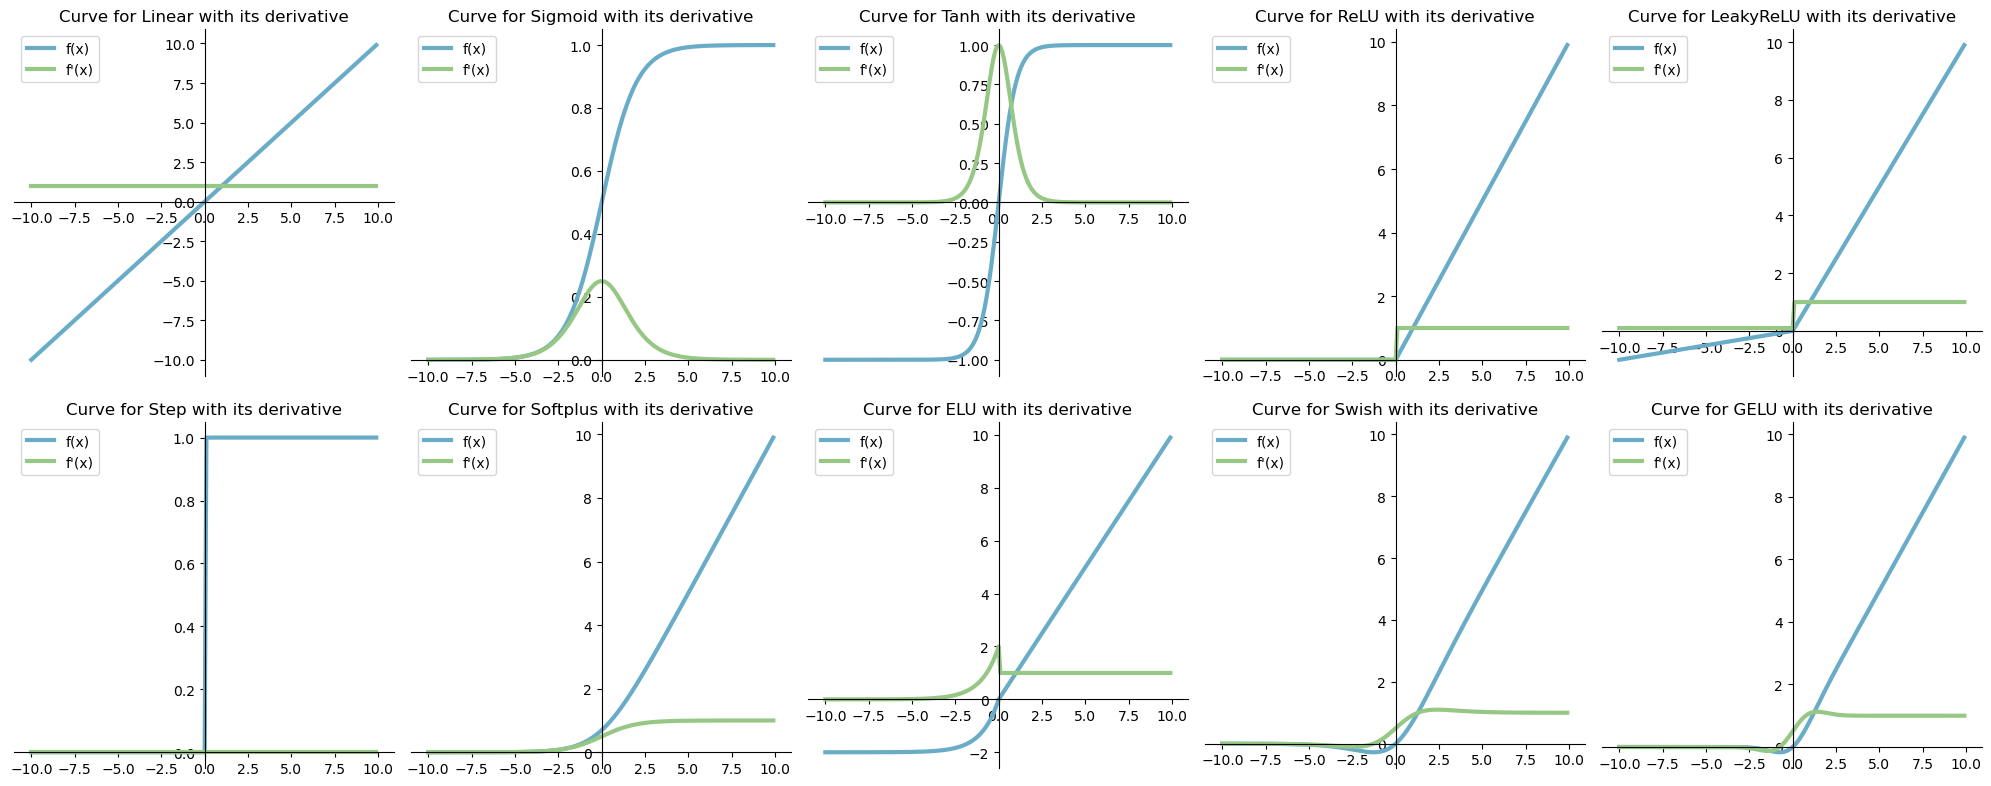

In [14]:
def plot(x, y, dy, title, ax):
    ax.plot(x, y, linewidth=3, label="f(x)", color="#69acc7")
    ax.plot(x, dy, linewidth=3, label="f'(x)", color="#97c784")
    ax.set_title(f"Curve for {title} with its derivative")
    ax.legend(loc='best')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

from scipy.special import erf

fig = plt.figure(figsize=(4*5, 4*2))
axes = fig.subplots(2, 5)

x = np.arange(-10, 10, 0.1)

y  = x 
dy = np.ones_like(x)
plot(x, y, dy, 'Linear', axes[0, 0])

y  = 1/(1+np.exp(-x)) 
dy = y*(1-y)
plot(x, y, dy, 'Sigmoid', axes[0, 1])

y  = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x)) 
dy = 1-(y**2)
plot(x, y, dy, 'Tanh', axes[0, 2])

y  = np.maximum(x, 0) 
dy = np.heaviside(x,1) 
plot(x, y, dy, 'ReLU', axes[0, 3])

alpha = 0.1
y  = np.where(x<0, alpha*x, x)
dy = np.where(x<0, alpha,   1)
plot(x, y, dy, 'LeakyReLU', axes[0, 4])

y  = np.heaviside(x,1) 
dy = np.zeros_like(y)
plot(x, y, dy, 'Step', axes[1, 0])

y  = np.log(1+np.exp(x))
dy = 1/(1+np.exp(-x))
plot(x, y, dy, 'Softplus', axes[1, 1])

alpha = 2
y  = np.where(x<=0, alpha*(np.exp(x)-1), x)
dy = np.where(x<=0, alpha*np.exp(x), 1)
plot(x, y, dy, 'ELU', axes[1, 2])

f = 1 + np.exp(-x)
y  = x/f
dy = (f + (x*np.exp(-x)))/(f**2)
plot(x, y, dy, 'Swish', axes[1, 3])

s = x / np.sqrt(2)
erf_prime = lambda x: (2 / np.sqrt(np.pi)) * np.exp(-(x ** 2))
y  = 0.5 * x * (1 + erf(s))
dy = 0.5 + 0.5 * erf(s) + ((0.5 * x * erf_prime(s)) / np.sqrt(2))
plot(x, y, dy, 'GELU', axes[1, 4])


fig.tight_layout()
plt.show()

<div align="center">
    <video width="1280" height="720" src="./assets/videos/Quiz-NN.mp4" controls></video>
</div>

### <img src="./assets/icons/deep-learning.png" style="height:1em"> Network of Neurons (Multi Layer Perceptron --- MLP)

To construct a network of neurons, we begin by organizing neurons into **layers**, forming acyclic graphs.

A typical **Artificial Neural Network** consists of three primary layers: **input**, **hidden**, and **output**. 
Each layer comprises a collection of neurons, typically fully connected to the neurons in the subsequent layer. 
This means every input neuron connects with weighted connections to every hidden neuron, and similarly, every hidden neuron connects to every output neuron. 
This structure ensures that cycles are not present, preventing infinite loops during the network's forward pass.
Instead of an amorphous blobs of connected neurons, Neural Network models are often organized into distinct layers of neurons. 

Neural Network models organize neurons into distinct layers rather than having them interconnected in an undifferentiated manner.

<div align="center">
    <img src="./assets/images/ANN.png" width=50%/>
    <br>
    <video width="1280" height="720" src="./assets/videos/NeuralNetwork.mp4" controls></video>
</div>

The network processes information as follows: 
input flows forward from the input layer through the hidden layers and ultimately through the output layer to produce a response. 
Each neuron within any layer uses the same activation function to propagate its information forward to the subsequent layer.

<div align="center">
    <video width="1280" height="720" src="./assets/videos/ForwardPropagation.mp4" controls></video>
</div>

The output of the hidden layer, termed **features**, represents multiple layers of nonlinear transformations learned by the neural network (e.g., edges and shapes), which are then combined in the final layer to make predictions about more complex objects.

This characteristic distinguishes neural networks as general nonlinear classifiers, contrasting with perceptrons, which are linear classifiers.

<details>
<summary> Neural Networks as Universal Approximators </summary>
<br>
Neural Networks with fully-connected layers define a family of functions parameterized by their weights. 
It's pertinent to ask: 
What is the expressive power of this family of functions? 
Specifically, are there functions that cannot be modeled with a Neural Network?

Interestingly, Neural Networks with at least one hidden layer are universal approximators [[Cybenko](https://link.springer.com/article/10.1007/BF02551274), [Nielsen](http://neuralnetworksanddeeplearning.com/chap4.html)]. 
This means that for any continuous function $g(x)$ and any small $ \epsilon>0 $, there exists a Neural Network $\psi(x)$ with one hidden layer  (using a suitable non-linearity, such as sigmoid) such that $∣ f(x)−g(x) ∣ < \epsilon$ for all $x$. 
In other words, neural networks can approximate any continuous function arbitrarily closely.

If one hidden layer suffices to approximate any function, why use more layers and go deeper? 
The answer is that the fact that a two-layer Neural Network is a universal approximator, while intriguing mathematically, is not always practically useful. 
In one dimension, the ''sum of indicator bumps'' function $f(x)= \sum_i c_i1(a_i<x<b_i)$ where a,b,c are parameter vectors is also a universal approximator, but no one would suggest that we use this functional form in Machine Learning. 
Neural Networks work well in practice because they compactly express nice, smooth functions that fit well with the statistical properties of data we encounter in practice, and are also easy to learn using our optimization algorithms (e.g. gradient descent). 

Empirically, deeper networks (with multiple hidden layers) often perform better than shallow networks, despite having equivalent representational power.
As an aside, in practice, three-layer neural networks often outperform two-layer networks, but deeper networks (four, five, or more layers) may not consistently offer additional benefits.
<br>
</details>

Furthermore, neural networks can have various topologies, such as; 

<div align="center">
    <img src="./assets/images/Architectures.png"/>
    <br>
    <video width="1280" height="720" src="./assets/videos/Quiz-Perceptron.mp4" controls></video>
</div>

Next, let's proceed to create a neuron, a layer, and a network of neurons using our defined Value class!

In [15]:
class Module:

    # Explictly make gradients 0.0
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0.0

    # List of Parameters
    def parameters(self):
        return []

class Neuron(Module):

    # Initialises weights, bias and activations for the neuron
    def __init__(self, nin, activation='ReLU', layer_name='', neuron_name=''):
        
        self.w = [Value(np.random.uniform(-1,1), label=f"Weight of {layer_name} {neuron_name} for Input {i+1}") for i in range(nin)]
        self.b = Value(0, label=f"Bias of {layer_name} {neuron_name}")
        self.activation = activation

    # Sets the list of parameters in the neuron
    def parameters(self):
        return self.w + [self.b]

    # Information when printing neuron
    def __repr__(self):
        return f"{self.activation}Neuron(nin={len(self.w)})"
    
    # Forward Pass -> Compute the output of the neuron
    def __call__(self, x):
        
        # Weighted Sum
        w = sum((wi*xi for wi,xi in zip(self.w, x)))
        
        # Add the bias
        out = w + self.b
        
        # Activation Function is applied
        if self.activation == 'ReLU':
            out = out.relu()
        elif self.activation == 'Tanh':
            out = out.tanh()
        elif self.activation == 'Linear':
            out = out
            
        # Output of Neuron
        return out

class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        # Define neurons of a layer
        self.neurons = [Neuron(nin, neuron_name=f"Neuron {i+1}", **kwargs) for i in range(nout)]

    # Sets the list of parameters in the layer
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    # Information when printing layer
    def __repr__(self):
        return f"Layer of [ {', '.join(str(n) for n in self.neurons)} ]"
    
    # Forward Pass -> Compute the output of the layer
    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

class MLP(Module):

    def __init__(self, nin, nouts, activations=None):
        if activations is not None:
            assert len(nouts) == len(activations), 'Activations not defined for some layers'
        else:
            activations = ['Linear'] * len(nouts)
            
        sz = [nin] + nouts 
        
        # Define layers of a MLP
        self.layers = [Layer(sz[i], sz[i+1], activation=activations[i], layer_name=f"Layer {i+1}") for i in range(len(nouts))]

    # Sets the list of parameters in the MLP
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    # Information when printing MLP
    def __repr__(self):
        new_line = f"\n{'-'*8}> "
        return f"MLP of [{new_line}{new_line.join(str(layer) for layer in self.layers)}\n]"
    
    # Forward Pass -> Compute the output of the MLP
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

Let's also define a function that will compute **loss** *(reward/penalty)* for our neural network

In [16]:
def compute_loss(model, batch_size=None, X=X_train, y=y_train):
    
    # Process Data in batches, in case data is too big to handle
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    # Format Data to our Datatype
    inputs = [ [Value(xrow[0], label='X'), Value(xrow[1], label='Y')] for xrow in Xb]
    
    # Forward Pass to get the scores
    scores = list(map(model, inputs))
    
    # Max-Margin Loss to calculate fitness based on scores and y
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    output_loss = sum(losses) * (1.0 / len(losses))
    
    # L2 Regularization (Optional)
    ## To improve performance, we also regularise the parameters. 
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    
    # Compute Final Loss -> Max-Margin Loss + L2 Regularization Loss
    loss = output_loss + reg_loss
    
    # Compute Predictions and Accuracy
    predictions = np.array([1 if (scorei.data > 0) else -1 for scorei in scores])
    accuracy    = sum([(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)])/len(yb)
    
    # Return everything required
    data = {}
    data['loss']        = loss
    data['scores']      = scores
    data['predictions'] = predictions
    data['accuracy']    = 100*accuracy
    return data

In [17]:
model = MLP(nin=2, nouts=[2, 2, 1]) # 2-layer neural network
print(model)
print(f"Number of Parameters: {len(model.parameters())}")

MLP of [
--------> Layer of [ LinearNeuron(nin=2), LinearNeuron(nin=2) ]
--------> Layer of [ LinearNeuron(nin=2), LinearNeuron(nin=2) ]
--------> Layer of [ LinearNeuron(nin=2) ]
]
Number of Parameters: 15


In [18]:
data = compute_loss(model)
print(f"Loss: {data['loss'].data:.4f} | Accuracy: {data['accuracy']: 5.2f}%")

Loss: 0.9772 | Accuracy:  65.00%


### <img src="./assets/icons/update.png" style="height:1em"> Backpropagation --- Trick to update weights (parameters) of multilayer neural networks

<div align="center">
    <video width="1280" height="720" src="./assets/videos/Backpropagation.mp4" controls></video>
</div>

<details>
<summary> Click Here to Read History on BackPropagation </summary>
<br>

For many years, it was unknown how to learn the weights in a multi-layered neural network. 
(Actually, the idea of using simulated evolution to search for the weights could have been used, but no one thought to do that.) 

In addition, as shown above, In late 1960s [[Minsky and Papert](https://leon.bottou.org/publications/pdf/perceptrons-2017.pdf)] showed that Perceptrons could not learn the XOR function. 
Hinting that you could not do simple functions without having multi-layers. 
This killed research into neural networks for more than a decade. 
So, the idea of neural networks generally was ignored until the mid 1980s when the **Back-Propagation of Error** (Backprop) was created [[Rumelhart et.al.](https://dl.acm.org/doi/10.5555/65669.104451)].
</details>

The **Backpropagation algorithm** (using *Backprop*), also called the *generalized delta rule*, is a *supervised* learning method for multilayer feed-forward networks in the field of Deep Learning.
Technically, it is a method for training the weights in a multilayer feed-forward neural network. 

The principle of the backpropagation approach is to model a given function by modifying internal weightings of input signals to produce an expected output signal. 
The system is trained using a *supervised learning* method, where the error between the system’s output and a known expected output is presented to the system and used to modify its internal state.

With backpropagation, the errors are sent back through the network again and the weights are adjusted, improving the neural network. 
The neural network learns by varying the weights or parameters of a network so as to minimize the difference between the predictions of the neural network and the desired values. 
This process is repeated thousands of times, adjusting a neural network's weights in response to the error it produces, until the error can't be reduced anymore. 
This phase where the artificial neural network learns from the data is called training.
During this process, the layers learn the optimal features for the model, which has the advantage that features do not need to be predetermined.

<div align="center">
    <img src="./assets/images/Backpropagation.png"/>
</div>

Activation functions play a crucial role in these neural networks.

> Additionally, there's a transfer function that computes the neuron's activation by combining the weighted inputs, adding the bias, and applying a nonlinear transformation to limit the output range.
This limits the activations from growing too big or too small. (More on this later...)

Let's understand how activation functions help in output range.

<div align="center">
    <img src="./assets/images/Exploding-Vanishing.png"/>
    <br>
    <img src="./assets/images/ReLU.png" width=75%/>
</div>


Backpropagation can be used for both classification and regression problems, but we will focus on classification in this lecture.

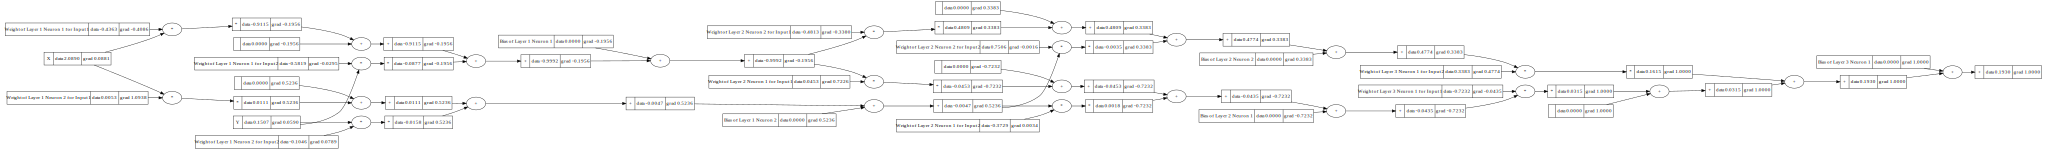

In [19]:
data['scores'][0].backward()
draw_dot(data['scores'][0])

### <img src="./assets/icons/practice.png" style="height:1em"> Train a simple neural network

Now let's train our neural network to classify the two moons. 

Backprop in action!

In [20]:
n_iter = 20
n_log  = 1
learning_rate = lr = 1.0

model = MLP(nin=2, nouts=[16, 16, 1], activations=['ReLU', 'ReLU', 'Linear']) # 2-layer neural network
print(model)
print(f"Number of Parameters: {len(model.parameters())}")
print(f"\n{'-'*70}\n")
train_history = []

# Optimize Iteratively
for k in range(n_iter):
    
    # Zero-Grad
    model.zero_grad()

    # Forward Pass -> Compute Loss
    data = compute_loss(model)
    
    # Backward Pass
    data['loss'].backward()
        
    # Log Details
    if k % n_log == 0:
        print(f"Step: {k+1:3d} | Loss: {data['loss'].data:.4f} | Accuracy: {data['accuracy']:5.2f}% | Learning Rate: {lr:.2f}")
        train_history.append((data['loss'].data, data['accuracy'], lr))
    
    # Update Weights using SGD
    lr = learning_rate - 0.9*(k+1)/n_iter
    for p in model.parameters():
        p.data -= lr * p.grad
    

MLP of [
--------> Layer of [ ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2), ReLUNeuron(nin=2) ]
--------> Layer of [ ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16), ReLUNeuron(nin=16) ]
--------> Layer of [ LinearNeuron(nin=16) ]
]
Number of Parameters: 337

----------------------------------------------------------------------

Step:   1 | Loss: 0.5211 | Accuracy: 72.00% | Learning Rate: 1.00
Step:   2 | Loss: 0.6846 | Accuracy: 75.00% | Learning Rate: 0.95
Step:   3 | Loss: 1.7811 | Accuracy: 78.00% | 

Let's also visualise, Loss, Accuracy and Learning Rate over the iterations. 

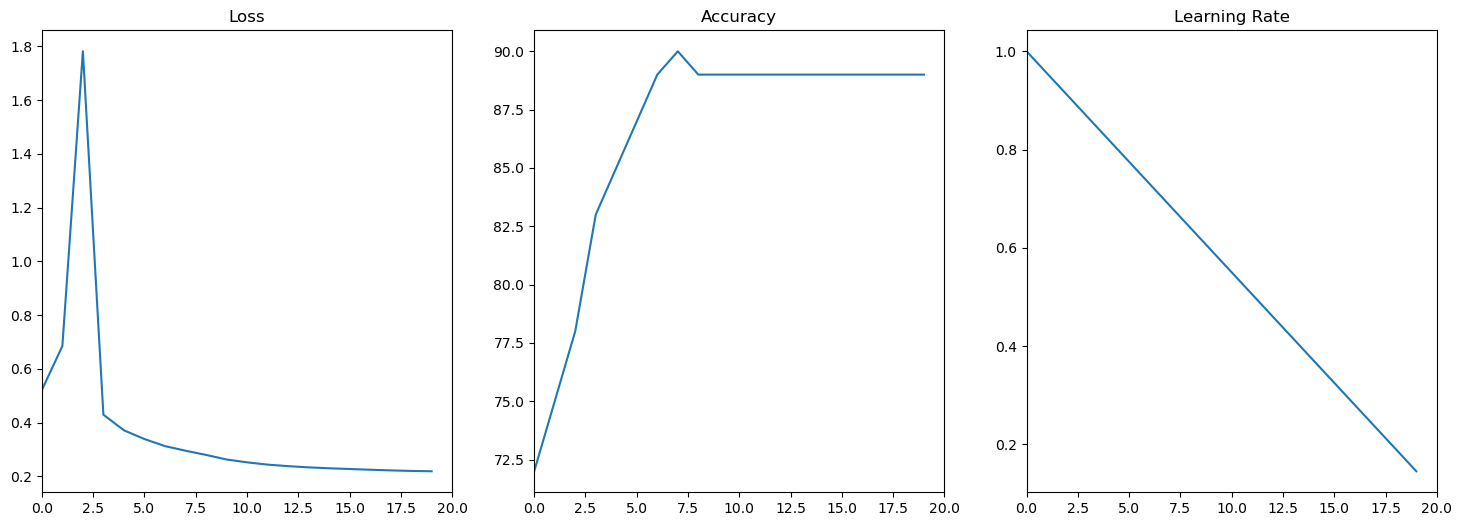

In [21]:
fig = plt.figure(figsize=(6*3, 6))
axes = fig.subplots(1, 3)

train_history = np.asarray(train_history)

for ax, d, t in zip(axes.flat, [train_history[:, 0], train_history[:, 1], train_history[:, 2]], ['Loss', 'Accuracy', 'Learning Rate']):
    ax.plot(d)
    ax.set(title=t, xlim=(0, n_iter))

plt.show()

Let's visualise the predictions of the neural network and see which points are misclassified.

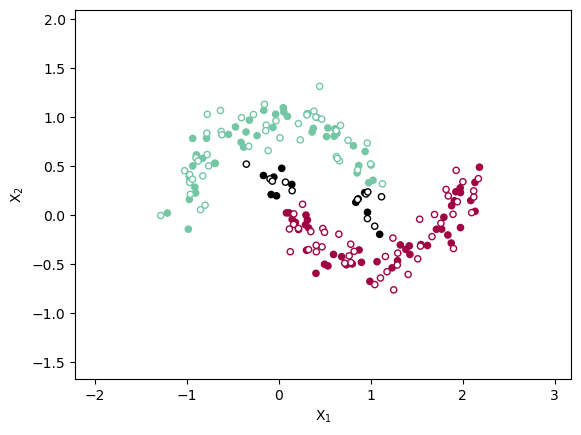

In [22]:
train_data = compute_loss(model, X=X_train, y=y_train)
test_data  = compute_loss(model, X=X_test,  y=y_test)

cmap = plt.cm.Spectral
fig, ax = plt.subplots()

train_color = [cmap(j%200) if i==j else 'k' for i, j in zip(train_data['predictions'], y_train)]
test_color  = [cmap(j%200) if i==j else 'k' for i, j in zip(test_data['predictions'],  y_test)]

ax.scatter(X_train[:,0], X_train[:,1], c=train_color,                s=20)
ax.scatter(X_test[:,0],  X_test[:,1],  edgecolor=test_color, c='w',  s=20)

ax.set(xlabel="X$_1$", ylabel="X$_2$", xlim =(X_train[:, 0].min()-1, X_train[:, 0].max()+1), ylim=(X_train[:, 1].min()-1, X_train[:, 1].max()+1))
plt.show()

Now let's visualise the **boundary** of the trained neural network, how does the boundary separating the two moons look like. 

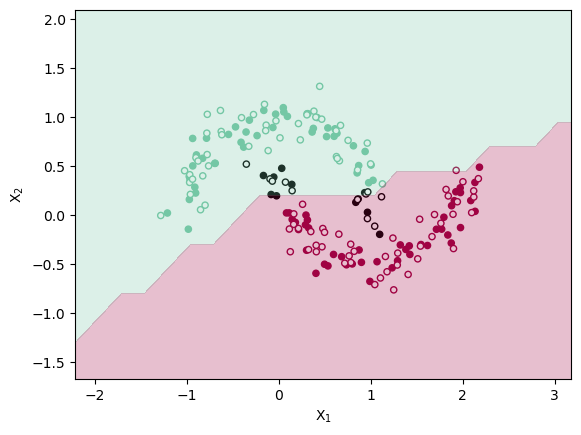

In [23]:
# Visualise Decision Boundary
resolution = 0.25
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 

xx, yy = np.meshgrid(np.arange(x_min, x_max+ resolution, resolution), np.arange(y_min, y_max+ resolution, resolution))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]

scores = list(map(model, inputs))

Z = np.array([s.data > 0 for s in scores]).reshape(xx.shape)

ax.contourf(xx, yy, Z, colors=[cmap(-1%200), cmap(1)], alpha=0.25)

fig

#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Try some other simple datasets

## <img src="./assets/icons/far-away.png" style="height:1em"> Beyond Multi-Layer Perceptron (MLPs)

### Convolution Neural Networks (CNNs) - Inspired by Visual Cortex

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width=30%/>
    <br>
    Processing a group of spatially close inputs.
    <br>
    <img src="https://miro.medium.com/v2/resize:fit:1358/1*D6iRfzDkz-sEzyjYoVZ73w.gif"width=50%>
    <br>
    Kernel acts as filteration.
</div>

### Recurrent Neural Networks (RNNs) - Inspired by Memory

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif" width=45%/>
    <br>
    Passing hidden state to next time step
    <br>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*WMnFSJHzOloFlJHU6fVN-g.gif"width=45%>
    <br>
    Processing inside a RNN Cell
</div>

### Gated Recurrent Unit (GRUs) - Improvement on RNNs for Long Term Memory

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*jhi5uOm9PvZfmxvfaCektw.png" width=45%/>
    <br>
    GRU Cell
</div>

### Long Short Term Memory (LSTMs) - Improvement on RNNs for Long Term Memory

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*0f8r3Vd-i4ueYND1CUrhMA.png" width=45%/>
    <br>
    LSTM Cell
</div>

### Transformers (Self-Attention) - Inspired by Attention

<div align="center">
    <img src="./assets/images/Self-Attention.png">
    <br>
    Self-Attention Processing in Transformers
    <br>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*G8thyDVqeD8WHim_QzjvFg.gif">
    <br>
    Exemplar Working of Self-Attention
</div>



## <img src="./assets/icons/action.png" style="height:1em"> Moving Forward: Example of Handwritten Digits Classification using PyTorch

Given a task, how does one train a neural network to do/solve the task? This involves the following steps:

1. Determine an appropriate network architecture.
2. Define a data set that will be used for training.
3. Define the neural network parameters to be used for training.
4. Train the network.
5. Test the trained network.
6. Do post training analysis.

#### <img src="./assets/icons/warning.png" style="height:1em"> Preferably run on [Google Collab](https://colab.research.google.com/) or a PC with Nvidia GPU  <img src="./assets/icons/warning.png" style="height:1em">

### <img src="./assets/icons/setup.png" style="height:1em"> Libraries Setup

We again start by importing the libraries

In [24]:
%pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
from tqdm.auto import tqdm
from itertools import repeat
from matplotlib import pyplot as plt
from matplotlib import offsetbox

from sklearn import manifold
from sklearn.preprocessing import MinMaxScaler

import torch
import torchvision
import torch.nn.functional as F
from torch import nn as nn, optim as optim
from torchvision import datasets as tdatasets, transforms, utils as vutils

torch.manual_seed(seed)
device = 'cpu' if torch.cuda.is_available() else 'cuda'

### <img src="./assets/icons/construction.png" style="height:1em"> Determining an appropriate architecture

Recall that a neural network consists of an input layer, an output layer, and zero or more hidden layers. 
Once a network has been trained, when you present an input to the network, the network will propagate the inputs through its layers to produce an output. 

If the input represents an instance of the task, the output should be the solution to that instance after the network has been trained. Thus, one can view a neural network as a general pattern associator. 
In general, as far as the design of a neural network is concerned, you always begin by identifying the size of the input and output layers. 

Given a task, the first step is to identify the nature of inputs to the pattern associator. 
This is normally in the form of number of neurons required to represent the input. 
Similarly, you will need to determine how many output neurons will be required. 

First, note that as we increase the size and number of layers in a Neural Network, the capacity of the network increases. 
That is, the space of representable functions grows since the neurons can collaborate to express many different functions. 

We can observe that Neural Networks with more neurons can express more complicated functions. 
However, this is both a blessing (since we can learn to classify more complicated data) and a curse (since it is easier to overfit the training data). 
**Overfitting** occurs when a model with high capacity fits the noise in the data instead of the (assumed) underlying relationship. 
For example, the model with 20 hidden neurons fits all the training data but at the cost of segmenting the space into many disjoint decision regions. 

Based on our discussion above, it seems that smaller neural networks can be preferred if the data is not complex enough to prevent overfitting. 
However, this is incorrect - there are many other preferred ways to prevent overfitting in Neural Networks (such as L2 regularization, dropout, input noise). 
In practice, it is always better to use these methods to control overfitting instead of the number of neurons.

The subtle reason behind this is that smaller networks are harder to train with local methods such as Gradient Descent: 
It’s clear that their loss functions have relatively few local minima, but it turns out that many of these minima are easier to converge to, and that they are bad (i.e. with high loss). 
Conversely, bigger neural networks contain significantly more local minima, but these minima turn out to be much better in terms of their actual loss. 
Since Neural Networks are non-convex, it is hard to study these properties mathematically, but some attempts to understand these objective functions have been made, 
e.g. in a recent paper The Loss Surfaces of Multilayer Networks. 
In practice, what you find is that if you train a small network the final loss can display a good amount of variance - in some cases you get lucky and converge to a good place but in some cases you get trapped in one of the bad minima. 
On the other hand, if you train a large network you’ll start to find many different solutions, but the variance in the final achieved loss will be much smaller. 
In other words, all solutions are about equally as good, and rely less on the luck of random initialization.
Through much empirical practice, you will develop your own heuristics about this. 

For the MNIST Dataset, we have used 4 MLP Layers. 

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 10)
        

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

### <img src="./assets/icons/mining.png" style="height:1em"> Define a data set that will be used for training

Once you have decided on the network architecture, you have to prepare the data set that will be used for training. Each item in the data set represents an input pattern and the correct output pattern that should be produced by the network (since this is supervised training). 

In most tasks, there can be an infinite number of such input-output associations. Obviously it would be impossible to enumerate all associations for all tasks (and it would make little sense to even try to do this!). 
You have to then decide what comprises a good representative data set that, when used in training a network, would generalize to all situations.

In the example of the AND, the data set is very small, finite (only 4 cases!), and **exhaustive**.

However, MNIST Dataset consists of images of size 28*28 pixels which are monochromatic. Since monochromatic means either black or white, there exists $ 2^{28 \times 28} $ possible images (this number is 237 digits long). If we go for greyscale, there would exist $ 256^{28\times28} $ possible images (this number is 1889 digits long). 

In [27]:
batch_size      = 128
test_batch_size = 512

train_kwargs = {'batch_size': batch_size}
test_kwargs  = {'batch_size': test_batch_size}

def infinite_loader(data_loader):
    for loader in repeat(data_loader):
        for data in loader:
            yield data
            
train_dataset = tdatasets.MNIST('../data', train=True,  download=True, transform=transforms.ToTensor())
test_dataset  = tdatasets.MNIST('../data', train=False, transform=transforms.ToTensor())
train_loader  = infinite_loader(torch.utils.data.DataLoader(train_dataset,**train_kwargs))
test_loader   = torch.utils.data.DataLoader(test_dataset, **test_kwargs)

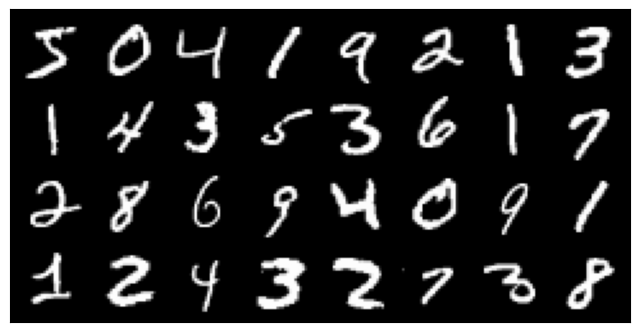

In [28]:
batch = next(iter(train_loader))

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots()

ax.imshow(np.transpose(vutils.make_grid(batch[0].to(device)[:32], padding=2, normalize=True).cpu(), (1,2,0)))
ax.set(xticks=[], yticks=[])
plt.show()

### <img src="./assets/icons/adjust.png" style="height:1em"> Define the neural network parameters

The next step is to define the hyperparameters required to train the neural network.
The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. 
If you train the neural network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. 
That is, the loss on the validation set will start increasing as the training set loss drops.

#### Choose the number of iterations
This is the number of batches of samples from the training data we'll use to train the network. The more iterations you use, the better the model will fit the data. However, if you use too many iterations, then the model with not generalize well to other data, this is called overfitting. You want to find a number here where the network has a low training loss, and the validation loss is at a minimum. As you start overfitting, you'll see the training loss continue to decrease while the validation loss starts to increase.

#### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

#### Choose the number of hidden neurons
The more hidden neurons you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden neurons is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden neurons you choose.

In [29]:
n_iter          = 1000
learning_rate   = 0.1
n_log           = 1

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, eta_min=0.01, T_max=n_iter)

model

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

### <img src="./assets/icons/predictive.png" style="height:1em"> Training and Testing the network


Once all the parameters are specified, you start the training process. 
This involves presenting each input pattern to the network, propagating it all the way until an output is produced, comparing the output with the desired target, computing the error, backpropagating the error, and applying the learning rule. 
This process is repeated as needed. 

In general, you should train the network for several iterations, it can be anywhere from a few hundred to millions! depennding on the dataset. 
Gradually, the network will begin to show improved and stable performance. 
Performance of the network is measured according to the task, for our classificiation task, we measure the accuracy, while for regression task, we can measure mean squared error. 

You can either stop the training process after a certain number of iterations have elapsed, or after the performance has saturated (early-stopping).

Once the network has been trained, it is time to test it. 
There are several ways of doing this. 
Perhaps the easiest is to turn learning off and then see the outputs produced by the network for each input in the data set. 
When a trained network is going to be used in a *deployed* application, all you have to do is save the weights of all interconnections in the network into a file. 
The trained network can then be recreated at anytime by reloading the weights.

**Note**: Instead of training-then-testing, there is another methodology: you can test-while-training, which encompases other evaluation technqiues like cross validation. 

In [30]:
def train(model, device, train_loader, optimizer, scheduler, n_iter):
    train_history = []
    model.train()
    with tqdm(total=n_iter) as bar:
        for batch_idx, (data, target) in enumerate(train_loader):
            
            # Converting data to required format
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 784)
            
            # Explictily Zeroing Gradients
            optimizer.zero_grad()
            
            # Forward Pass
            output = model(data)
            
            # Calculate Loss
            loss = F.nll_loss(output, target)
            
            # Backward Pass
            loss.backward()
            
            # Updating Weights
            optimizer.step()
            
            if batch_idx % n_log == 0:
                bar.update(n_log)
                bar.set_postfix({'Loss':  f"{loss.item():.4f}", 'Learning Rate': f"{scheduler.get_last_lr()[0]:.4f}"})
                train_history.append((loss.item, scheduler.get_last_lr()[0]))
            
            # Changing Learning Rate
            scheduler.step()
            
            if batch_idx == n_iter-1:
                break

def test(model, device, test_loader):
    model.eval()
    
    test_loss = 0
    correct   = 0
    
    images    = []
    labels    = []
    outputs   = []
    
    with torch.no_grad() and tqdm(total=len(test_loader)) as bar:
        for data, target in test_loader:
            
            # Converting data to required format
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 784)
            
            # Forward Pass
            output = model(data)
            
            # Calculate Loss
            loss = F.nll_loss(output, target, reduction='sum').item()  
            
            # Get Prediction
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            
            correct   += pred.eq(target.view_as(pred)).sum().item()
            test_loss += loss
            outputs.extend(output.detach().cpu().numpy())
            images.extend(data.detach().cpu().numpy())
            labels.extend(target.detach().cpu().numpy())
            
            bar.update(1)

    test_loss /= len(test_loader.dataset)
    correct   /= len(test_loader.dataset)
    images      = np.asarray(images).reshape(-1, 1, 28, 28).transpose(0, 2, 3, 1)
    labels      = np.asarray(labels)
    outputs     = np.asarray(outputs)

    print(f"Test set--- Average loss: {test_loss:.4f}, Accuracy: {100. * correct:.2f}%")
    return images, labels, outputs

In [31]:
train(model, device, train_loader, optimizer, scheduler, n_iter)

  0%|          | 0/1000 [00:00<?, ?it/s]

Let's save the model for reusing

In [32]:
torch.jit.script(model).save('mnist-try.pt')

Let's load the saved model and evaluate it on our test dataset

In [33]:
trained_model = torch.jit.load('mnist-try.pt')

In [34]:
images, labels, outputs = test(trained_model, device, test_loader)

  0%|          | 0/20 [00:00<?, ?it/s]

Test set--- Average loss: 0.2555, Accuracy: 92.52%


### <img src="./assets/icons/analytics.png" style="height:1em"> Do post training analysis


Perhaps the most important step in using neural networks is the analysis one performs once a network has been trained. There are a whole host of analysis techniques, here we present some of them which can be used.

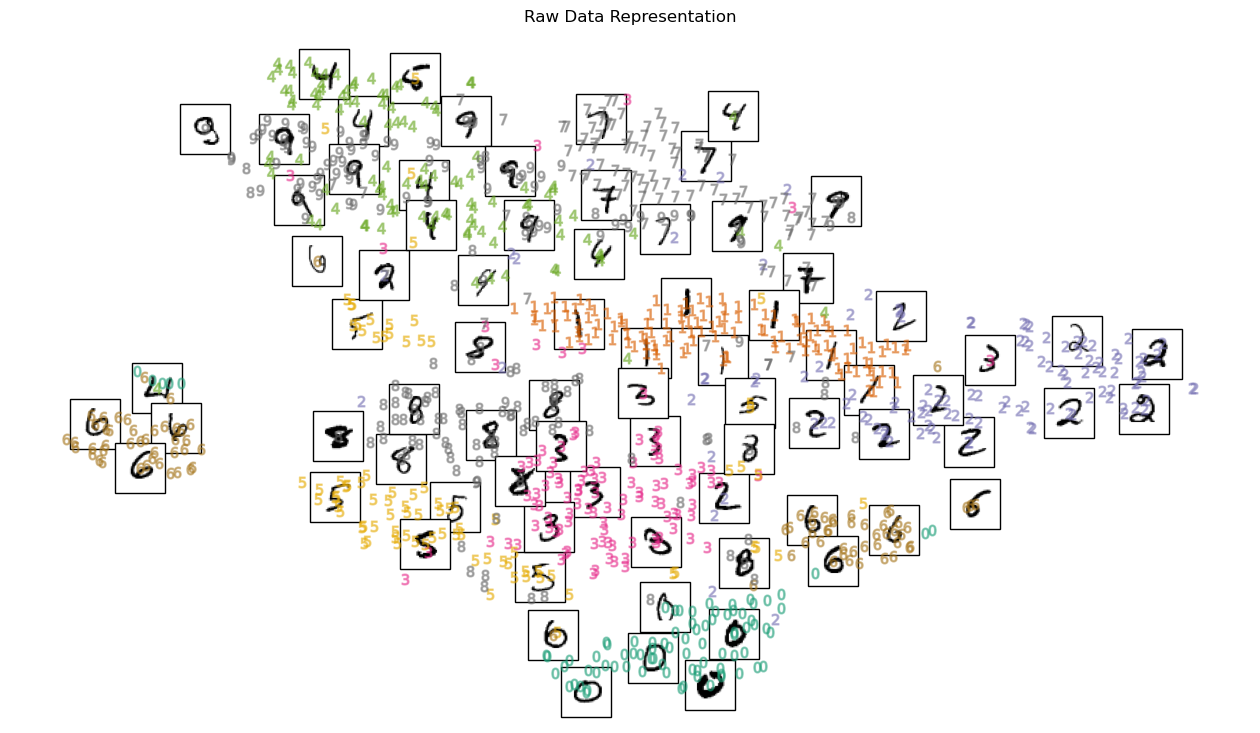

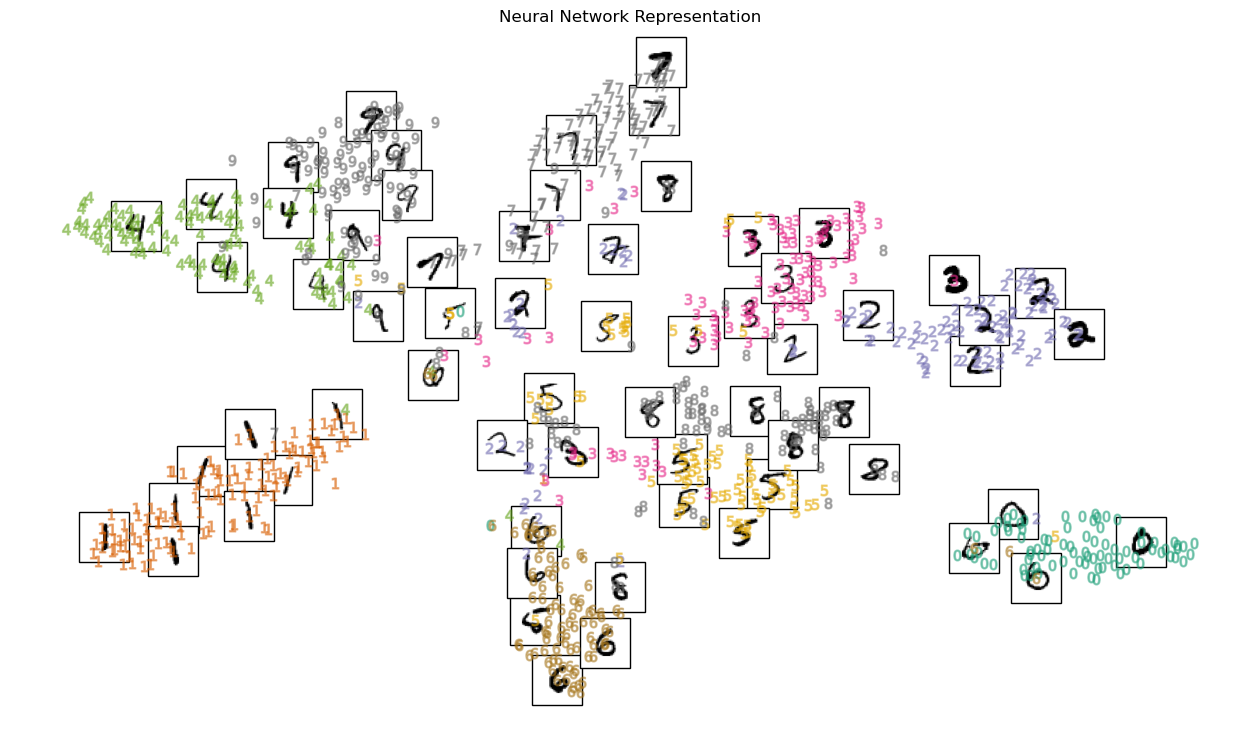

In [35]:
def plot_embedding(embedding, images, labels, title):
    fig = plt.figure(figsize=(16, 9))
    ax  = fig.subplots()
    
    X = MinMaxScaler().fit_transform(embedding)
    
    for digit in range(10):
        ax.scatter(*X[labels == digit].T, marker=f"${digit}$", s=60, color=plt.cm.Dark2(digit), alpha=0.425, zorder=2,)
    
    shown_images = np.array([[1.0, 1.0]])
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray_r), X[i])
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

num_images = 1000

tsne = manifold.TSNE(n_components=2)

image_embedding = tsne.fit_transform(images[:num_images].reshape(num_images, -1), labels[:num_images])
plot_embedding(image_embedding, images[:num_images], labels[:num_images], "Raw Data Representation")

output_embedding = tsne.fit_transform(outputs[:num_images].reshape(num_images, -1), labels[:num_images])
plot_embedding(output_embedding, images[:num_images], labels[:num_images], "Neural Network Representation")

#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Try more advanced adaptive optimizers like Adam 
#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Try some more innovative analysis to understand the trained neural network

## <img src="./assets/icons/jester.png" style="height:1em"> Bonus: Fooling the trained neural network

#### <img src="./assets/icons/warning.png" style="height:1em"> Preferably run on [Google Collab](https://colab.research.google.com/) or a PC with Nvidia GPU  <img src="./assets/icons/warning.png" style="height:1em">

### <img src="./assets/icons/setup.png" style="height:1em"> Libraries Setup

**Note**: Install git from [this website](https://git-scm.com/download/win). Alternatively, if you have Anaconda or Miniconda installed you can use `conda install git`. At worst, case manually download the repository and put it in the same folder as this notebook.

In [ ]:
%pip install git+https://github.com/RobustBench/robustbench.git 

In [ ]:
from scipy.optimize import differential_evolution as de

import torch

from robustbench.data import load_cifar10
from robustbench.utils import load_model

from IPython import display

if device == 'cuda':
    torch.cuda.empty_cache()

### <img src="./assets/icons/data-modeling.png" style="height:1em"> Loading Data and Trained Model

In [ ]:
x_test, y_test = load_cifar10(n_examples=50)
model = load_model(model_name='Standard', dataset='cifar10', threat_model='Linf').to(device)
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
image_id = 10
image = x_test[image_id]
label = y_test[image_id]

In [ ]:
output = torch.softmax(model(image[None, ...].to(device)), dim=1)
conf, pred = output.max(dim=1)

fig = plt.figure()
ax = fig.subplots()
ax.imshow(image.permute(1,2,0))
ax.set(xticks=[], yticks=[], title=f"True Class: {classes[label]}", xlabel=f"Predicted Class {classes[pred.item()]} has {conf.item()*100:.2f}% confidence")
plt.show()

### <img src="./assets/icons/anomaly.png" style="height:1em"> Defining Perturbation

In [ ]:
def perturb_image(perturbations, img):
    
    perturbations = perturbations.astype(int)
    if perturbations.ndim < 2:
        perturbations = np.array([perturbations])
    
    img = (img * 255).detach().cpu().numpy().astype(int)
    imgs = np.tile(img, [len(perturbations)] + [1]*(perturbations.ndim+1))
    
    for x, img in zip(perturbations, imgs):
        pixels = np.split(x, len(x) // 5)
        for pixel in pixels:
            x_pos, y_pos, *value = pixel
            img[:, round(x_pos), round(y_pos)] = value
        
    imgs = imgs/255.0
    imgs = torch.from_numpy(imgs).float()
    
    return imgs

In [ ]:
pixel = np.array([6, 6, 255, 0, 0]) 
image_perturbed = perturb_image(pixel, image)[0]

output = torch.softmax(model(image_perturbed[None, ...].to(device)), dim=1)
conf, pred = output.max(dim=1)

fig = plt.figure()
ax = fig.subplots()
ax.imshow(image_perturbed.permute(1,2,0))
ax.set(xticks=[], yticks=[], title=f"True Class: {classes[label]}", xlabel=f"Predicted Class {classes[pred.item()]} has {conf.item()*100:.2f}% confidence")
plt.show()

### <img src="./assets/icons/cyber-attack.png" style="height:1em"> Few-Pixel Attack

In [ ]:
def attack(image, target, pixel_count=1, maxiter=100, popsize=256):
    
    bounds = [(0,32), (0,32), (0,256), (0,256), (0,256)] * pixel_count
    popmul = max(1, popsize // len(bounds))
    
    popsize = popmul * len(bounds)
    nc = int(np.sqrt(popsize))
    nr = int(np.ceil(popsize/float(nc)))

    fig = plt.figure(figsize=(nc*4, nr*4))
    axes = fig.subplots(nr, nc)
    for ax, _ in zip(axes.flat, range(popsize)):
        ax.set(title=f"True Class: {classes[label]}")
        ax.set(xlabel=f"Predicted Class {None}\nTrue Class {None} has {None}% condifence")

    for ax in axes.flat:
        ax.set(xticks=[], yticks=[])
        ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    
    fig.tight_layout()
        
    dh = display.display(fig, display_id=True)

    
    def run(perturbations, image, target, evaluate=False):
        images_perturbed = perturb_image(perturbations, image).to(device)
        probabilities = torch.softmax(model(images_perturbed), dim=1)
        prediction = torch.argmax(probabilities, dim=1)
        if evaluate:
            return prediction != target
        else:
            confidence = probabilities[:, target].detach().cpu().numpy()
            
            for i, (ax, image, pred, fitness) in enumerate(zip(axes.flat, images_perturbed.permute(0, 2, 3, 1), prediction, confidence)):
                ax.imshow(image)
                ax.set(xlabel=f"Predicted Class {classes[pred.item()]}\nTrue Class {classes[label]} has {fitness*100:.2f}% condifence")

            dh.update(fig) 
            
            return confidence
    
    def predict_fn(xs):
        xs = xs.transpose()
        return run(xs, image, target, evaluate=False)
    
    def callback_fn(x, convergence):
        return run(x, image, target, evaluate=True)

    result = de(
        predict_fn, bounds=bounds, maxiter=maxiter, popsize=popmul, vectorized=True,
        recombination=1, atol=-1, callback=callback_fn, polish=False, disp=True)
    
    return result.x    

In [ ]:
attacked_perturbation = attack(image, label, pixel_count=5)

In [ ]:
image_perturbed = perturb_image(attacked_perturbation, image)[0]

output = torch.softmax(model(image_perturbed[None, ...].to(device)), dim=1)
conf, pred = output.max(dim=1)
true_conf = output[:, label]

fig = plt.figure()
ax = fig.subplots()
ax.imshow(image_perturbed.permute(1,2,0))
ax.set(xticks=[], yticks=[], title=f"True Class: {classes[label]}", xlabel=f"Predicted Class {classes[pred.item()]} has {conf.item()*100:.2f}% confidence\nTrue Class {classes[label]} has {true_conf.item()*100:.2f}% condifence")
plt.show()

#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Instead of DE, try to use SGD to optimize the attack
#### <img src="./assets/icons/try.png" style="height:1em"> **Try-it-out**: Can you modify to create a targeted attack, where you can define what would be the predicted class?

## <img src="./assets/icons/owl.png" style="height:1em"> Words of Wisdom

### <img src="./assets/icons/limited.png" style="height:1em"> Limitations of Deep Learning

<div align="center">
    <video width="1280" height="720" src="./assets/videos/Limitations.mp4" controls></video>
</div>

### <img src="./assets/icons/bias.png" style="height:1em"> Effect of Bias

- Assists in achieving better fit and in learning complex patterns. 
Bias allows the perceptron to make adjustments to its output independently of the inputs. 
It acts like the intercept added in a linear equation, which helps the model in a way that can best fit for the given data. 
Bias also allows the network to learn and represent more complex relationships between the input and output variables.

- Handling zero inputs and mitigating the problems of Vanishing Gradients. 
Activation functions introduce non-linearity into the perceptron. 
Bias helps the perceptron shift the activation function towards positive or negative side. 
By adding the bias, perceptron can train over points that do not pass through origin, thereby ensuring that a neuron can activate even when all of its input values are zero. 

### <img src="./assets/icons/function.png" style="height:1em"> Activation Functions

- Sigmoid. 
It takes a real-valued number and ''squashes'' it into range between 0 and 1. 
In particular, large negative numbers become 0 and large positive numbers become 1. 
The sigmoid function has seen frequent use historically since it has a nice interpretation as the firing rate of a neuron: 
from not firing at all (0) to fully-saturated firing at an assumed maximum frequency (1). 
In practice, the sigmoid non-linearity has recently fallen out of favor and it is rarely ever used. 
It has two major drawbacks:

    - Sigmoids saturate and kill gradients. 
    A very undesirable property of the sigmoid neuron is that when the neuron's activation saturates at either tail of 0 or 1, the gradient at these regions is almost zero. 
    Recall that during backpropagation, this (local) gradient will be multiplied to the gradient of this gate's output for the whole objective. 
    Therefore, if the local gradient is very small, it will effectively ''kill'' the gradient and almost no signal will flow through the neuron to its weights and recursively to its data.
    Additionally, one must pay extra caution when initializing the weights of sigmoid neurons to prevent saturation. 
    For example, if the initial weights are too large then most neurons would become saturated and the network will barely learn.

    - Sigmoid outputs are not zero-centered. 
    This is undesirable since neurons in later layers of processing in a Neural Network would be receiving data that is not zero-centered. 
    This has implications on the dynamics during gradient descent, because if the data coming into a neuron is always positive, then the gradient on the weights $w$ will during backpropagation become either all be positive, or all negative (depending on the gradient of the whole expression $f$. 
    This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. 
    However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. 
    Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem above.

- Tanh. 
It squashes a real-valued number to the range [-1, 1]. 
Like the sigmoid neuron, its activations saturate, but unlike the sigmoid neuron its output is zero-centered. 
Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. 
Also note that the tanh neuron is simply a scaled sigmoid neuron, in particular the following holds: $\tanh(x)=2\sigma(2x)−1$

- ReLU.
The Rectified Linear Unit has become very popular in the last few years. 
It computes the function $f(x)=\max(0,x)$. 
In other words, the activation is simply thresholded at zero. 
There are several pros and cons to using the ReLUs:
    
    - (+) It was found to greatly accelerate (e.g. a factor of 6 in [[Krizhevsky et al.](https://www.cs.toronto.edu/~fritz/absps/imagenet.pdf)]) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. 
    It is argued that this is due to its linear, non-saturating form.

    - (+) Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.

    - (-) Unfortunately, ReLU units can be fragile during training and can ''die''. 
    For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. 
    If this happens, then the gradient flowing through the unit will forever be zero from that point on. 
    That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. 
    For example, you may find that as much as 40% of your network can be ''dead'' (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. 
    With a proper setting of the learning rate this is less frequently an issue.

- LeakyReLU.
Leaky ReLUs are one attempt to fix the ''dying ReLU'' problem.
Instead of the function being zero when x < 0, a leaky ReLU will instead have a small positive slope (of 0.01, or so). 
Some people report success with this form of activation function, but the results are not always consistent. 
The slope in the negative region can also be made into a parameter of each neuron, as seen in PReLU neurons, introduced in [He et al.](https://arxiv.org/abs/1502.01852). 
However, the consistency of the benefit across tasks is presently unclear.

### <img src="./assets/icons/observation.png" style="height:1em"> Observations on Gradients and Gradient Descent

- Numerical vs Analytic Gradient.
There are two ways to compute the gradient: A slow, approximate but easy way (numerical gradient), and a fast, exact but more error-prone way that requires calculus (analytic gradient). 

- Practical considerations while using Numerical Gradient. 
Note that in the mathematical formulation the gradient is defined in the limit as h goes towards zero, but in practice it is often sufficient to use a very small value (such as 1e-5). 
Ideally, you want to use the smallest step size that does not lead to numerical issues. 
Additionally, in practice it often works better to compute the numeric gradient using the centered difference formula: $\frac{f(x+h)−f(x−h)}{2h}$. [[Wiki- Numerical Differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation)]

- Local search algorithm. 
So in general it can get stuck in local optima. 
We use examples from linear regression which is a convex optimization problem, so for a small enough learning rate, it will converge to a global optimum.

- Fixed Points of Gradient Descent, i.e., values of $ w^{(k+1)} = w^{(k)} $.
These are the stationary points where differentiation is 0, i.e., $\nabla \mathcal(J) = 0$. 
They maybe stable (e.g. local optima) ot unstable (e.g. saddle points).

- Invariances of Gradient Descent. 
It is invariant to rigid transformations (rotation, reflection, and translation)

- Batched Stocastic Gradient Descent. 
It is possible to run stochastic gradient descent where every step we touch more than one example.
This is called minibatch stochastic gradient descent and the number of examples we look at per iterations is called the ''minibatch size''. 
(When the minibatch size is 1, we recover stochastic gradient descent.) 
In many environments, using a larger minibatch can be a good idea because the gradient is less noisy (computed as an average over the examples) and faster because matrix-vector libraries
work better with larger matrices.

- Unbiased Estimate. Stocastic Gradient Descent makes significant progress before it has even looked at all the data, this is because if we sample a training example at random SGD gives an unbiased estimate of the batched gradient. 

### <img src="./assets/icons/start-button.png" style="height:1em"> Preprocessing Input

- Normalisation (or Standardisation). 
A coomon trick when training machine learning models is to normalize or standardize the inputs to zero mean and unit variance. This ensures faster convergenve. 

### <img src="./assets/icons/3d.png" style="height:1em"> Modelling Neural Network

- Random Intialisation of Weights. 
It's important to ''**break the symmetry**'' of the neurons in the networks or, in other words, force the neurons to be different at the beginning. 
This means that it’s important to *initialize* the parameters w and b randomly. 
A good method for random initialization is Gaussian random or uniform random.
Sometimes tuning the variance of the initialization also helps.
Also make sure that the random initialization does not ''**saturate**'' the networks. 
This means that most of the time, for your data, the values of the neurons should be between 0.2 and 0.8. 
This is because we do not want to neurons to have too many values of zeros and ones. 
When that happens, the gradient is small and thus the training is much longer.

- Choosing Learning Rate.
Picking a good learning rate α can be tricky. 
A large learning rate can change the parameters too aggressively or a small learning rate can change the parameters too conservatively. 
Both should be avoided, a good learning rate is one that leads to good overall improvements in the objective function. 
To select good $\alpha$, it’s also best to monitor the progress of your training. 
In many cases, a learning rate of 0.1 or 0.01 is a very good start, if you use SGD.
For other optimizers like Adam, starting learning rate can differ. 

- Choosing Hyperparamters. 
Picking good hyperparameters (architectural parameters such as number of layers, number of neurons
on each layers) for your neural networks can be difficult and is a topic of current research. 
A standard way to pick architectural parameters is via cross-validation: Keep a hold-out validation set that the training never touches. 
If the method performs well on the training data but not the validation set, then the model overfits: it has too many degrees of freedom and remembers the training cases but does not generalize to new cases. 
If the model overfits, we need to reduce the number of hidden layers or number of neurons on each hidden layer. 
If the method performs badly on the training set then the model underfits: it does not have enough degrees of freedom and we should increase the number of hidden layers or number of neurons. 
Be warned that bad performance on the training set can also mean that the learning rate is chosen poorly.

- Hyperparameter Optimization. 
Picking good hyperparameters can also be automated using grid search, random search or Bayesian
optimization. 
In grid search, every possible combination of hyperparameters will be tried and crossvalidated with a hold-out validation set. 
In case that grid search is expensive because the number of hyperparameters is large, one can try random search where hyperparameter configurations are generated and tried at random. 
Bayesian optimization looks at the performances of networks at previous hyperparameter combinations and fits a function through these points, it then picks the next combination that maximizes some utility function such as the mean plus some function of the uncertainty. 

### <img src="./assets/icons/gpu-mining.png" style="height:1em"> Memory footprint


- Precision of float variables. 
It is possible to use single precision (float16) for the parameters in the networks instead of double precision (float32). 
This reduces the memory footprint of the model in half and usually does not hurt the performances of the networks. 
A downside is that it is more tricky to check the correctness of the gradient using the numerical approximation.

### <img src="./assets/icons/experiment.png" style="height:1em"> Personal Experience

- Monitoring. 
Have a way to monitor the progress of your training. 
Perhaps the best method is to compute the objective function on the current example or on a subset of the training data or on a held-out validation set. 

- Code Optimization. 
Neural networks can take a long time to train and thus it’s worth spending time to optimize the code
for speed. 
To speed up the training, make use of fast matrix vector libraries, which often provide good speed-up over na ̈ıve implementation of matrix vector multiplication. The vectorized version of the backpropagation algorithm will come in handy in this case.

## <img src="./assets/icons/thank-you.png" style="height:1em"> Acknowledgements

- [SimpliLearn - What is Artificial Network?](https://youtu.be/uMzUB89uSxU?si=KyY5C5HhoDnDlAeL)
- [SimpliLearn - What is a Neural Network?](https://www.youtube.com/watch?v=bfmFfD2RIcg)
- [SimpliLearn - What is Deep Learning?](https://www.youtube.com/watch?v=6M5VXKLf4D4)
- [Andrej Karpathy - Micrograd Library](https://github.com/karpathy/micrograd)
- [Fei-Fei Li - Standford University CS231n: Deep Learning for Computer Vision](https://cs231n.stanford.edu/index.html)
- [Flaticon - Icons](https://www.flaticon.com/free-icons/)

## <img src="./assets/icons/books.png" style="height:1em"> Extra Study Material

(Increasing order of complexity)

- [3Blue1Brown - DeepLearning](https://www.youtube.com/watch?v=aircAruvnKk)
- [Nvidia - DeepLearning Blog](https://www.nvidia.com/en-us/glossary/deep-learning/)
- [James Loy - How to build your own Neural Network from scratch in Python](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)
- [Douglas Blank - Artificial Neural Networks](https://jupyter.brynmawr.edu/services/public/dblank/BioCS115%20Computing%20through%20Biology/2016-Spring/Notebooks/Artificial_Neural_Networks.ipynb)
- [Quoc V. Le - A tutorial on Deep Learning](https://cs.stanford.edu/~quocle/tutorial1.pdf)
- [Matt Mazur - A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- [Michael Nielsen - Neural Networks and Deep Learning ](http://neuralnetworksanddeeplearning.com)
- [Roger Grosse - University of Toronto CSC2541 Winter 2022 Lecture 1](https://www.cs.toronto.edu/~rgrosse/courses/csc2541_2022/slides/lec01.pdf)
- [Roger Grosse - University of Toronto CSC2541 Winter 2022 Tutorial 1](https://www.cs.toronto.edu/~rgrosse/courses/csc2541_2022/tutorials/tut01.pdf)
- [Roger Grosse - University of Toronto CSC2541 Winter 2022 Lecture 7](https://www.cs.toronto.edu/~rgrosse/courses/csc2541_2022/slides/lec07.pdf)
- [Roger Grosse - University of Toronto CSC2541 Winter 2022 Lecture 9](https://www.cs.toronto.edu/~rgrosse/courses/csc2541_2022/slides/lec09.pdf)